<a href="https://colab.research.google.com/github/czyz-patryk/dataScience/blob/main/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.9.2'

In [22]:
(X_train, y_train), (X_test, y_test) = load_data()

In [23]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [25]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

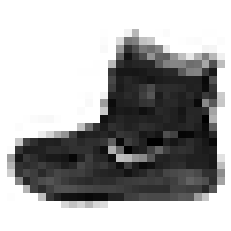

In [26]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

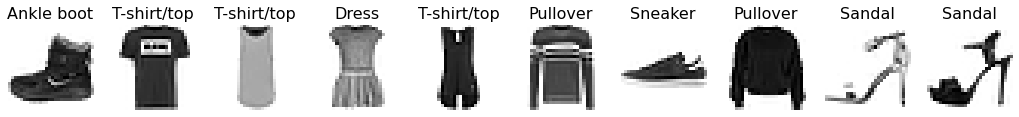

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [28]:
X_train = X_train / 255.
X_test = X_test / 255.

In [29]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [30]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5261 - accuracy: 0.8129 - val_loss: 0.4287 - val_accuracy: 0.8467
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3858 - accuracy: 0.8619 - val_loss: 0.4185 - val_accuracy: 0.8447
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3491 - accuracy: 0.8750 - val_loss: 0.3580 - val_accuracy: 0.8739
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3293 - accuracy: 0.8813 - val_loss: 0.3806 - val_accuracy: 0.8687
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3179 - accuracy: 0.8879 - val_loss: 0.3488 - val_accuracy: 0.8851
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3020 - accuracy: 0.8933 - val_loss: 0.3850 - val_accuracy: 0.8777
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2952 - accuracy: 0.8972 - val_loss: 0.3828 - val_accuracy:

In [32]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch 
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.526132,0.812875,0.428725,0.846667,0
1,0.385819,0.861896,0.418504,0.844667,1
2,0.349098,0.875042,0.357952,0.873917,2
3,0.329323,0.881292,0.380612,0.868667,3
4,0.317901,0.887854,0.348839,0.885083,4
5,0.301961,0.893333,0.385036,0.877667,5
6,0.295231,0.897250,0.382778,0.881417,6
7,0.286840,0.899625,0.373887,0.881083,7
8,0.279928,0.902771,0.371327,0.885333,8
9,0.274476,0.905771,0.404028,0.874417,9


In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8671000003814697


In [39]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 3ms/step


array([[0.000000000008, 0.            , 0.000000000001, ..., 0.0005229987  , 0.000000211866, 0.99945986    ],
       [0.000000202978, 0.            , 0.99979544    , ..., 0.            , 0.000000000001, 0.            ],
       [0.000000000171, 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000002987472, 0.            , 0.000000014297, ..., 0.000000000511, 0.9999921     , 0.            ],
       [0.            , 0.9999998     , 0.            , ..., 0.000000000003, 0.            , 0.00000000009 ],
       [0.00002192396 , 0.000000192145, 0.00001661139 , ..., 0.078552365   , 0.1361098     , 0.002923949   ]], dtype=float32)

In [40]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000017,0.000000,0.000523,0.000000,0.999460
1,0.000000,0.000000,0.999795,0.000000,0.000076,0.000000,0.000128,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.166375,0.000000,0.000448,0.000485,0.000724,0.000000,0.831873,0.000003,0.000091,0.000000


In [44]:
predict_cls=model.predict(X_test) 
predictions_cls=np.argmax(predict_cls,axis=1)
predictions_cls

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [45]:

#@title Wybierz indeks zdjęcia:
idx = 2908 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

In [47]:

#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 781 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)